In [ ]:
#SHRUTHI's ANALYSIS OF EXPRESSION OF DDX3X and DDX3Y in DEPMAP. COntinuation of Erik's Work begins 1/17/2023
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os as os
os.chdir("/lab/solexa_page/eowen/221101_Rotation/DepMap_22Q2_Data/")

In [47]:
#Get all expression from CCLE cell lines
CCLE_expression_full = pd.read_csv('CCLE_expression_full.csv', header = 'infer', index_col = 0)
pickle.dump(CCLE_expression_full, open('CCLE_expression_full.pickle', 'wb'))

In [48]:
os.chdir("/lab/solexa_page/shruthir/CancerDepMap/")
XY_cells = pd.read_csv('XY_CCLE_expression_full.csv', header = 'infer', index_col = 0)

In [74]:
#Added in by shruthi: sort cells out just with Xist and DDX3Y expression, save as male cell lines
XY_cells = CCLE_expression_full.loc[(CCLE_expression_full['XIST (ENSG00000229807)'] <= 2) &
                                   (CCLE_expression_full['DDX3Y (ENSG00000067048)'] > 0) &
                                   (CCLE_expression_full['RPS4Y1 (ENSG00000129824)'] > 0)]
                                   
                                   #XY_cells
#XY_cells.to_csv(path_or_buf='XY_CCLE_expression_full.csv')

In [55]:
XY_cells.head(5)

,TSPAN6 (ENSG00000000003),TNMD (ENSG00000000005),DPM1 (ENSG00000000419),SCYL3 (ENSG00000000457),C1orf112 (ENSG00000000460),FGR (ENSG00000000938),CFH (ENSG00000000971),FUCA2 (ENSG00000001036),GCLC (ENSG00000001084),NFYA (ENSG00000001167),...,ENSG00000288714,ENSG00000288717,ENSG00000288718,ENSG00000288719,ENSG00000288720,ENSG00000288721,ENSG00000288722,ENSG00000288723,ENSG00000288724,ENSG00000288725
ACH-001289,4.566815,0.584963,7.106537,2.543496,3.504620,0.000000,0.189034,3.813525,4.221104,3.481557,...,0.000000,0.879706,0.000000,0.014355,0.014355,0.432959,2.972693,0.056584,0.0,0.070389
ACH-001339,3.150560,0.000000,7.379032,2.333424,4.227279,0.056584,1.310340,6.687061,3.682573,3.273516,...,0.028569,0.000000,0.084064,0.000000,0.097611,0.367371,1.695994,0.084064,0.0,0.000000
ACH-000242,6.729145,0.000000,6.537607,2.456806,3.867896,0.799087,7.208381,5.569856,7.127014,4.568032,...,0.000000,0.000000,0.201634,0.028569,0.137504,0.678072,4.418190,0.000000,0.0,0.000000
ACH-000233,0.056584,0.000000,6.093602,3.970854,3.731183,0.028569,6.092969,3.033863,3.422233,4.725741,...,0.028569,0.000000,0.000000,0.014355,0.124328,1.304511,5.596041,0.124328,0.0,0.000000
ACH-000461,4.016140,0.000000,6.533875,2.226509,3.021480,0.028569,0.084064,5.588265,6.380418,3.864929,...,0.000000,0.163499,0.137504,0.014355,0.150560,2.906891,3.694880,0.000000,0.0,0.000000


In [56]:
#Read in list of mutations from Erik
os.chdir("/lab/solexa_page/eowen/221101_Rotation/DepMap_22Q2_Data/")
CCLE_mutations = pd.read_csv("CCLE_mutations.csv", header='infer', index_col=0, low_memory=False)
CCLE_mutations.head(4)

,Entrez_Gene_Id,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,Reference_Allele,Alternate_Allele,...,isCOSMIChotspot,COSMIChsCnt,ExAC_AF,Variant_annotation,CGA_WES_AC,HC_AC,RD_AC,RNAseq_AC,SangerWES_AC,WGS_AC
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
VPS13D,55187,37,1,12359347,12359347,+,Nonsense_Mutation,SNP,C,A,...,False,0.0,NaN,damaging,34:213,NaN,NaN,NaN,34:221,NaN
AADACL4,343066,37,1,12726308,12726322,+,In_Frame_Del,DEL,CTGGCGTGACGCCAT,-,...,False,3.0,NaN,other non-conserving,57:141,NaN,NaN,NaN,9:0,28:32
IFNLR1,163702,37,1,24484172,24484172,+,Silent,SNP,G,A,...,False,0.0,NaN,silent,118:0,NaN,NaN,10:0,118:0,18:0
TMEM57,55219,37,1,25785018,25785019,+,Frame_Shift_Ins,INS,-,A,...,False,0.0,NaN,damaging,NaN,NaN,NaN,6:28,NaN,NaN


In [57]:
#Change to my folder
os.chdir("/lab/solexa_page/shruthir/CancerDepMap/")

In [58]:
#Get Damanged cell lines
os.chdir("/lab/solexa_page/eowen/221101_Rotation/DepMap_22Q2_Data/")
CCLE_mutations_damaging = pd.read_csv("CCLE_mutations_bool_damaging.csv", header='infer', index_col=0)
CCLE_DDX3X_damaged_cells = CCLE_mutations_damaging[CCLE_mutations_damaging.loc[:, 'DDX3X (1654)'] == 1]
CCLE_DDX3X_damaged_cells.head(5)

,FCGR2A (2212),SAA4 (6291),RPL10 (6134),ZNF891 (101060200),UBN1 (29855),TNNT1 (7138),API5 (8539),UGT1A4 (54657),GOLGA8H (728498),C9orf57 (138240),...,MAGEB17 (645864),INPPL1 (3636),MIER3 (166968),OR7G3 (390883),TAOK2 (9344),STMND1 (401236),XPNPEP1 (7511),MAVS (57506),BRSK2 (9024),FGF2 (2247)
ACH-001143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACH-001639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACH-002293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACH-000982,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACH-000534,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
#Have damaged lines, have sorted XY cells with expression of all genes. Need non damaged lines
os.chdir("/lab/solexa_page/shruthir/CancerDepMap/")
CCLE_DDX3X_intact_cells = CCLE_mutations_damaging[CCLE_mutations_damaging.loc[:, 'DDX3X (1654)'] == 0]
CCLE_DDX3X_intact_cells.head(5)

,FCGR2A (2212),SAA4 (6291),RPL10 (6134),ZNF891 (101060200),UBN1 (29855),TNNT1 (7138),API5 (8539),UGT1A4 (54657),GOLGA8H (728498),C9orf57 (138240),...,MAGEB17 (645864),INPPL1 (3636),MIER3 (166968),OR7G3 (390883),TAOK2 (9344),STMND1 (401236),XPNPEP1 (7511),MAVS (57506),BRSK2 (9024),FGF2 (2247)
ACH-000267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACH-001408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACH-000617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACH-002123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACH-000519,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
#Need expression of intact lines and expression of damaged lines. Get expression of all lines for only DDX3X and DDX3Y first
XY_DDX3 = XY_cells[['DDX3X (ENSG00000215301)','DDX3Y (ENSG00000067048)']]
XY_DDX3.head(5)

,DDX3X (ENSG00000215301),DDX3Y (ENSG00000067048)
ACH-001289,7.289004,5.318317
ACH-001339,6.206135,5.146492
ACH-000242,7.374344,4.998647
ACH-000327,5.971084,0.189034
ACH-000233,7.199967,4.712045


In [61]:
#Trim Damage table to only DDX3X and DDX3Y. Trim Intact Table to only DDX3X and DDX3Y
CCLE_DDX3X_damaged_cells = CCLE_DDX3X_damaged_cells[['DDX3X (1654)']]
CCLE_DDX3X_damaged_cells.head(5)
CCLE_DDX3X_intact_cells = CCLE_DDX3X_intact_cells[['DDX3X (1654)']]
CCLE_DDX3X_intact_cells.head(5)

,DDX3X (1654)
ACH-000267,0
ACH-001408,0
ACH-000617,0
ACH-002123,0
ACH-000519,0


In [ ]:
#Add a column that says mutated to mutated cells


In [ ]:
#Add a column that says intact to intact cells 

In [76]:
#Have DDX3X and DDX3Y expression, Have damage in the same format, need to merge
DDX3X_damaged_expression = CCLE_DDX3X_damaged_cells.merge(XY_DDX3,left_index=True,right_index=True)
DDX3X_damaged_expression

,DDX3X (1654),DDX3X (ENSG00000215301),DDX3Y (ENSG00000067048)
ACH-000534,1,6.248497,4.865424
ACH-001563,1,3.537296,5.090007
ACH-002055,1,4.060912,5.628190
ACH-000990,1,8.072695,0.189034
ACH-000654,1,7.640751,6.451706
ACH-001610,1,7.184379,5.032982
ACH-001097,1,2.049631,4.002703
ACH-000402,1,4.367371,5.878235
ACH-000056,1,6.637349,5.487358
ACH-000619,1,6.200850,3.861955


In [77]:
DDX3X_intact_expression = CCLE_DDX3X_intact_cells.merge(XY_DDX3,left_index=True,right_index=True)
DDX3X_intact_expression.head(5)

,DDX3X (1654),DDX3X (ENSG00000215301),DDX3Y (ENSG00000067048)
ACH-000267,0,6.798828,4.986411
ACH-000750,0,6.715344,0.214125
ACH-000544,0,4.788686,1.847997
ACH-000045,0,5.626439,5.262283
ACH-000774,0,6.721236,4.438293


In [78]:
#Concatenate frames to plot data from both
frames = [DDX3X_damaged_expression,DDX3X_intact_expression]
DDX3X_mut_expression = pd.concat(frames)
DDX3X_mut_expression.head(5)

,DDX3X (1654),DDX3X (ENSG00000215301),DDX3Y (ENSG00000067048)
ACH-000534,1,6.248497,4.865424
ACH-001563,1,3.537296,5.090007
ACH-002055,1,4.060912,5.628190
ACH-000990,1,8.072695,0.189034
ACH-000654,1,7.640751,6.451706


In [19]:
DDX3X_mut_expression.tail(5)

,DDX3X (1654),DDX3X (ENSG00000215301),DDX3Y (ENSG00000067048)
ACH-000493,0,7.512069,5.781097
ACH-000669,0,6.652630,0.150560
ACH-000794,0,5.877990,0.028569
ACH-000419,0,6.858230,0.084064
ACH-000341,0,6.931801,6.092123


In [79]:
#Make cell line a column
DDX3X_mut_expression.index.name = 'Cell_Line'
DDX3X_mut_expression.reset_index(inplace=True)
DDX3X_mut_expression.head(5)

,Cell_Line,DDX3X (1654),DDX3X (ENSG00000215301),DDX3Y (ENSG00000067048)
0,ACH-000534,1,6.248497,4.865424
1,ACH-001563,1,3.537296,5.090007
2,ACH-002055,1,4.060912,5.628190
3,ACH-000990,1,8.072695,0.189034
4,ACH-000654,1,7.640751,6.451706


<AxesSubplot:xlabel='DDX3X (1654)', ylabel='DDX3Y (ENSG00000067048)'>

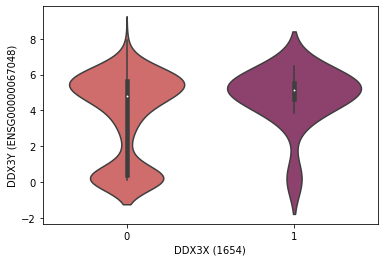

In [80]:
import seaborn as sns
sns.violinplot(x = DDX3X_mut_expression['DDX3X (1654)'],
            y = DDX3X_mut_expression['DDX3Y (ENSG00000067048)'], palette="flare")


#plt.savefig('DepmapDDX3Yexp.pdf', dpi = 300)

In [61]:
#Write table out and do stats
os.chdir("/lab/solexa_page/shruthir/CancerDepMap/")
DDX3X_mut_expression.to_csv(path_or_buf='DDX3X_mut_expression.csv')

In [ ]:
#P value of 0.0028